In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

In [5]:
file_names = [
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.whole-organism.csv",
]


file_path = "/shares/grossniklaus.botinst.uzh/eharputluoglu/newShannonFilesDir/shannonFiles1/"

file_names = [path.split('/')[-1] for path in file_names]




In [6]:
file_path + file_names[0]

'/shares/grossniklaus.botinst.uzh/eharputluoglu/newShannonFilesDir/shannonFiles2/output_metadata_CHG.Col-0.wt.aerial-part.csv'

In [7]:
dfs = [pd.read_csv(file_path + file_name, sep="\t") for file_name in file_names]



FileNotFoundError: [Errno 2] No such file or directory: '/shares/grossniklaus.botinst.uzh/eharputluoglu/newShannonFilesDir/shannonFiles2/output_metadata_CHH.Col-0.wt.whole-organism.csv'

In [ ]:
interval_measurements = []

for df, context in zip(dfs, file_names):
    context_name = context.split('.')[3] + "-" + ((context.split('/')[0]).split('.')[0]).split('_')[-1] 
    #print(context_name)
    df['interval'] = df['start'].astype(str) + '-' + df['end'].astype(str)  
    context_measurement = df.set_index('interval')['JSD_bit_'].rename(context_name)
    interval_measurements.append(context_measurement)

In [ ]:
#del dfs

In [ ]:
combined_df = pd.DataFrame()

for series in interval_measurements:
    combined_df = combined_df.join(series, how='outer')


print(combined_df.index.name)  # This should output 'interval'

In [ ]:
combined_df.to_csv("combined_df_chr1.csv")
#combined_df = pd.read_csv("combined_df_1.csv")

In [ ]:
combined_df = pd.read_csv("combined_df_chr1.csv")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CpG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[-1])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

#numeric_index = combined_df.index.str.split('-').str[0].astype(int)
#combined_df.index = numeric_index

window_size = 50000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman', numeric_only = True)

#correlation_matrix = combined_df.corr(method='spearman')



#correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)

correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows/columns with NaN values
correlation_matrix_clean = correlation_matrix.dropna(axis=0, how='any').dropna(axis=1, how='any')

# Now try plotting
sns.clustermap(correlation_matrix_clean, cmap='coolwarm', figsize=(10, 10))
plt.show()

In [ ]:
print(correlation_matrix.isfinite().all())


In [ ]:
print(f"Correlation matrix bottom right corner: \n{correlation_matrix.iloc[-5:, -5:]}")


In [54]:
correlation_matrix

,aerial-part-CHG,embryo-CHG,endosperm-CHG,immature-flower-buds-CHG,inflorescence-CHG,root-CHG,rosette-CHG,shoot-CHG,sperm-cell-CHG,vegetative-nucleus-CHG,...,embryo-CpG,endosperm-CpG,immature-flower-buds-CpG,inflorescence-CpG,root-CpG,rosette-CpG,shoot-CpG,sperm-cell-CpG,vegetative-nucleus-CpG,whole-organism-CpG
aerial-part-CHG,1.000000,-0.663351,-0.326533,-0.264662,-0.621042,NaN,-1.0,0.070147,-0.252316,-0.470134,...,-0.019364,-0.018330,0.073225,0.303270,NaN,-1.0,-0.180358,0.308799,-0.307744,0.368421
embryo-CHG,-0.663351,1.000000,0.371985,0.356562,0.698412,NaN,-1.0,-0.083234,0.411259,0.555119,...,0.128935,0.140501,-0.056633,-0.173008,NaN,-1.0,0.111079,-0.203701,0.419834,-0.001754
endosperm-CHG,-0.326533,0.371985,1.000000,0.221136,0.423559,NaN,-1.0,-0.012429,0.175875,0.284543,...,0.004606,0.217669,0.027047,-0.119540,NaN,-1.0,0.076907,-0.156056,0.236684,-0.125992
immature-flower-buds-CHG,-0.264662,0.356562,0.221136,1.000000,0.364221,NaN,1.0,-0.093366,0.187038,0.306655,...,-0.006143,0.114463,0.038153,-0.105996,NaN,1.0,-0.048533,-0.174029,0.228265,-0.107018
inflorescence-CHG,-0.621042,0.698412,0.423559,0.364221,1.000000,NaN,-1.0,-0.174141,0.478616,0.642197,...,0.162717,0.129584,0.009493,-0.110840,NaN,-1.0,0.005899,-0.149247,0.495836,-0.447368
root-CHG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rosette-CHG,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,NaN,1.0,NaN,-1.000000,-1.000000,...,-1.000000,1.000000,1.000000,-1.000000,NaN,1.0,NaN,-1.000000,-1.000000,NaN
shoot-CHG,0.070147,-0.083234,-0.012429,-0.093366,-0.174141,NaN,NaN,1.000000,-0.027935,-0.018935,...,-0.028134,-0.054246,0.263370,0.165423,NaN,NaN,0.245924,0.147648,-0.028475,0.500000
sperm-cell-CHG,-0.252316,0.411259,0.175875,0.187038,0.478616,NaN,-1.0,-0.027935,1.000000,0.700297,...,0.402919,0.092857,0.101941,0.286827,NaN,-1.0,-0.063694,0.317545,0.629889,-0.240351
vegetative-nucleus-CHG,-0.470134,0.555119,0.284543,0.306655,0.642197,NaN,-1.0,-0.018935,0.700297,1.000000,...,0.340149,0.136734,0.035277,0.131091,NaN,-1.0,0.036230,0.101963,0.760238,-0.257895


ValueError: The condensed distance matrix must contain only finite values.

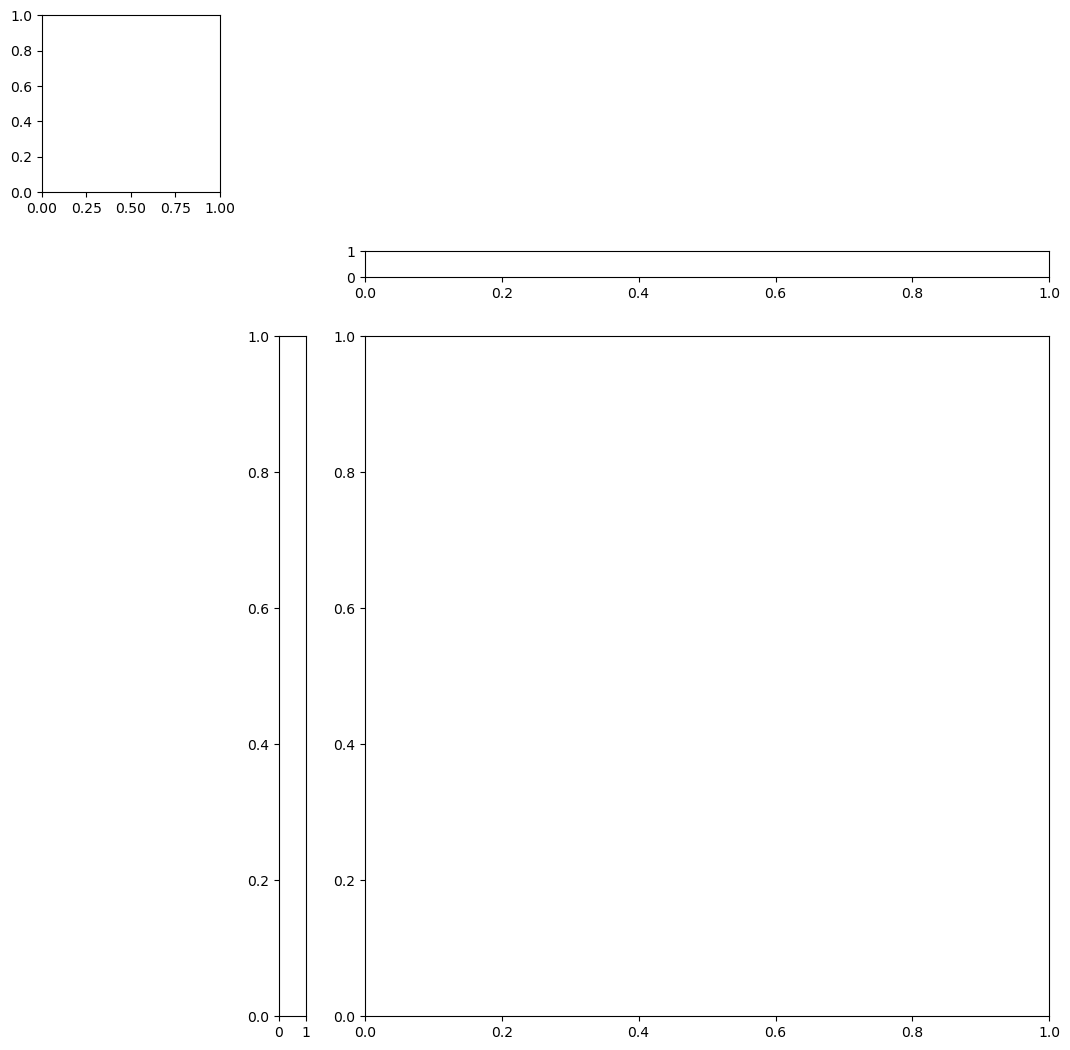

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CpG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[-1])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

#numeric_index = combined_df.index.str.split('-').str[0].astype(int)
#combined_df.index = numeric_index

window_size = 60000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman')

correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)


#sns.clustermap(correlation_matrix, cmap='coolwarm', col_colors=col_colors, row_colors = col_colors, figsize=(10, 10))


sns.clustermap(correlation_matrix, 
                           center=0.5, cmap="vlag",
                           row_colors=col_colors, col_colors=col_colors,
                           linewidths=0.75, figsize=(13, 13))




plt.show()